#### Importing libraries

In [122]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px
import os


### Read csv data

In [30]:
pd.set_option('display.max_columns',None)
AB_NYC=pd.read_csv(r"C:\Users\Prince\OneDrive\Desktop\projects\assignment 1\AB_NYC_2019.csv")

In [31]:
#show no of rows and columns
AB_NYC.shape  

(48895, 16)

In [32]:
AB_NYC.head(5)  # can also use sample fun. to see list 

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


In [33]:
AB_NYC.tail(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [34]:
AB_NYC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

### Making data copy

In [35]:
COPY_AB_NYC  = AB_NYC.copy()       # Makes copy of original data for further analysis.

In [36]:
COPY_AB_NYC.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355


In [37]:
COPY_AB_NYC.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

### Dropping unnecessary columns 

In [38]:
COPY_AB_NYC.drop(['id','host_name','last_review'],axis=1, inplace= True )

In [39]:
COPY_AB_NYC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48879 non-null  object 
 1   host_id                         48895 non-null  int64  
 2   neighbourhood_group             48895 non-null  object 
 3   neighbourhood                   48895 non-null  object 
 4   latitude                        48895 non-null  float64
 5   longitude                       48895 non-null  float64
 6   room_type                       48895 non-null  object 
 7   price                           48895 non-null  int64  
 8   minimum_nights                  48895 non-null  int64  
 9   number_of_reviews               48895 non-null  int64  
 10  reviews_per_month               38843 non-null  float64
 11  calculated_host_listings_count  48895 non-null  int64  
 12  availability_365                

### Replacing NaN values 

In [40]:
COPY_AB_NYC.fillna({'reviews_per_month':0, 'name':'unknown'},inplace=True)


In [41]:
COPY_AB_NYC.isnull().any()

name                              False
host_id                           False
neighbourhood_group               False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
reviews_per_month                 False
calculated_host_listings_count    False
availability_365                  False
dtype: bool

### Checking for duplicate 

In [42]:
COPY_AB_NYC.duplicated().sum()

0

In [43]:
COPY_AB_NYC.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [44]:
#dropping all rows wtih minimum nights more than 365
indices_to_drop = COPY_AB_NYC[COPY_AB_NYC['minimum_nights'] > 365].index
indices_to_drop

Index([ 1305,  2854,  5767,  7355,  8014, 10829, 11193, 13404, 14285, 15946,
       26341, 34487, 38664, 47620],
      dtype='int64')

In [45]:
COPY_AB_NYC = COPY_AB_NYC.drop(index=indices_to_drop)
COPY_AB_NYC.shape

(48881, 13)

In [46]:
#dropping all rows wtih price equal to 0
price_rows_to_drop = COPY_AB_NYC[COPY_AB_NYC['price'] == 0].index

In [47]:
COPY_AB_NYC = COPY_AB_NYC.drop(index=price_rows_to_drop)
COPY_AB_NYC.shape

(48870, 13)

In [48]:
print(COPY_AB_NYC['neighbourhood_group'].nunique())
print(COPY_AB_NYC['neighbourhood_group'].unique())
print(COPY_AB_NYC['room_type'].nunique())
print(COPY_AB_NYC['room_type'].unique())

5
['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']
3
['Private room' 'Entire home/apt' 'Shared room']


In [49]:
COPY_AB_NYC['neighbourhood_group'].value_counts()

neighbourhood_group
Manhattan        21654
Brooklyn         20089
Queens            5664
Bronx             1090
Staten Island      373
Name: count, dtype: int64

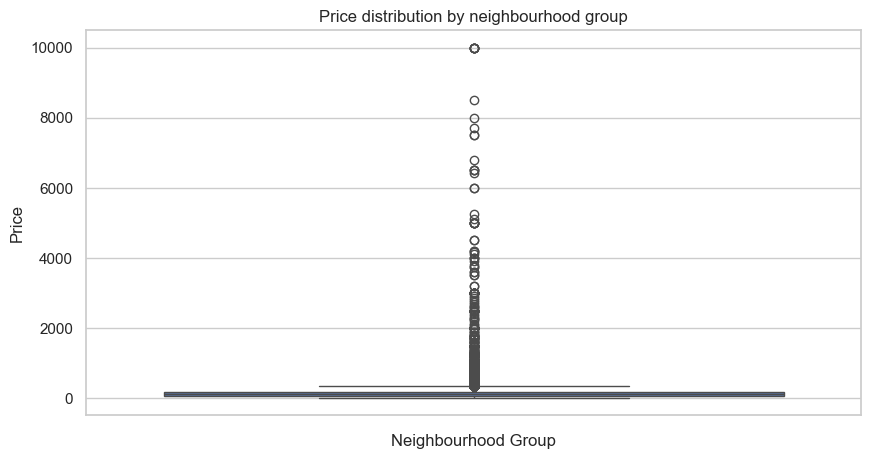

In [57]:
plt.figure(figsize=(10,5))
sns.boxplot(y='price' , data =COPY_AB_NYC).set_title('Price distribution by neighbourhood group')
sns.set_theme(style='whitegrid')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Price')
plt.show()

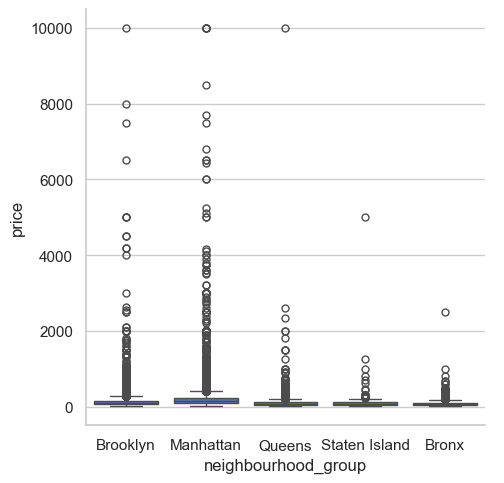

In [68]:
sns.catplot(data= COPY_AB_NYC, x="neighbourhood_group", y="price", kind="box")
plt.show()

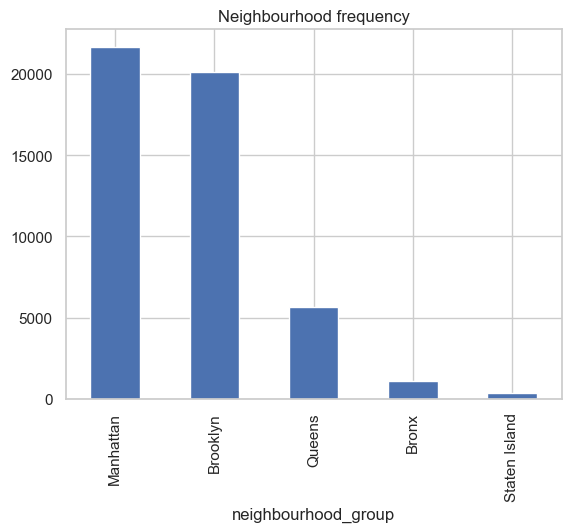

In [77]:
COPY_AB_NYC['neighbourhood_group'].value_counts().plot.bar().set_title("Neighbourhood frequency")
plt.show()

In [51]:
COPY_AB_NYC['room_type'].value_counts()

room_type
Entire home/apt    25398
Private room       22315
Shared room         1157
Name: count, dtype: int64

Text(0.5, 1.0, 'Room types frequency')

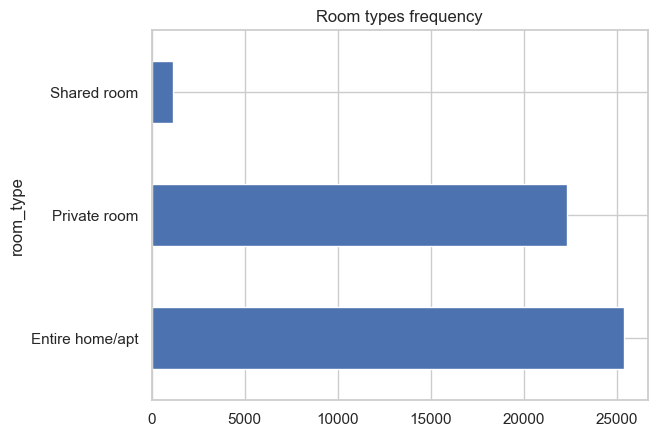

In [109]:
COPY_AB_NYC['room_type'].value_counts().plot.barh().set_title("Room types frequency")

Text(0.5, 1.0, 'Pie graphic of neighbourhood')

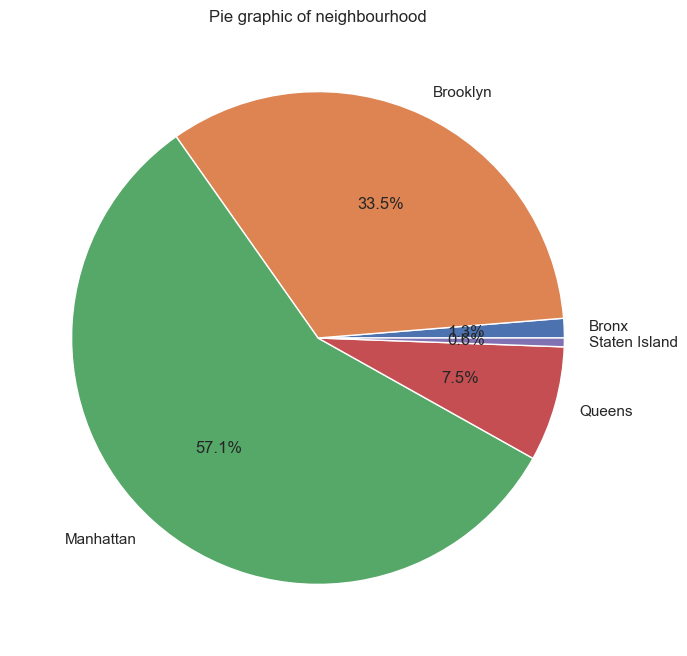

In [84]:
COPY_AB_NYC.groupby("neighbourhood_group").sum().plot.pie(y="price", autopct="%.1f%%", ylabel="", legend=False, figsize=(8,8))
plt.title('Pie graphic of neighbourhood')


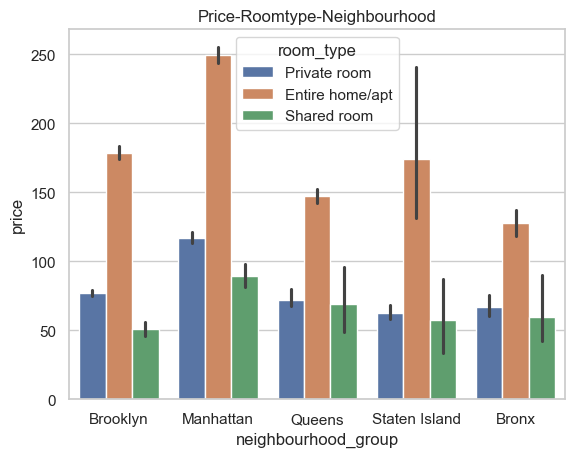

In [88]:
sns.barplot(x=COPY_AB_NYC['neighbourhood_group'],y=COPY_AB_NYC['price'],hue=COPY_AB_NYC['room_type'])
plt.title("Price-Roomtype-Neighbourhood")
plt.show()

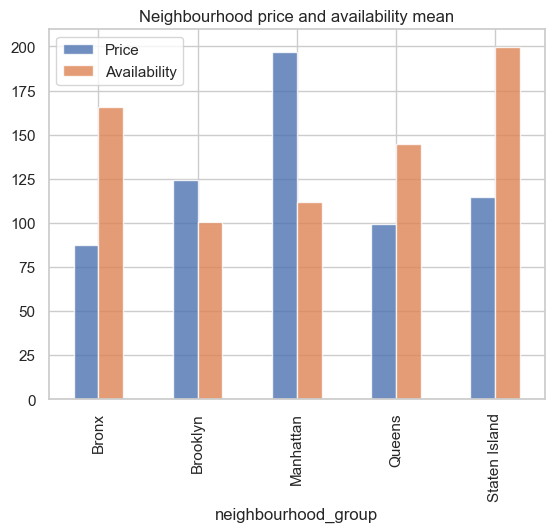

In [102]:
COPY_AB_NYC.groupby('neighbourhood_group').agg({'price':'mean','availability_365':'mean'}).plot.bar(alpha=0.8).set_title('Neighbourhood price and availability mean')
plt.legend(['Price','Availability'])

In [134]:
count_airbnbs = COPY_AB_NYC['neighbourhood_group'].value_counts()
count_airbnbs = count_airbnbs.reset_index()
count_airbnbs

,neighbourhood_group,count
0,Manhattan,21654
1,Brooklyn,20089
2,Queens,5664
3,Bronx,1090
4,Staten Island,373


#### Saving cleaned copy data in local folder 

In [110]:
COPY_AB_NYC.to_csv("cleaned_data_AB_NYC_2019.csv", index=False)